## Laboratorio 2 IA - Implementación del Algoritmo DBSCAN

### Bastian Rojas Pereira

#### Primero importamos las bibliotecas que utilizaremos para este laboratorio

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn import metrics

#### Cargamos los datos del data set encontrado en github

In [2]:
url = "https://raw.githubusercontent.com/selva86/datasets/master/Auto.csv"
data = pd.read_csv(url)

#### Es el mismo conjunto de datos utilizado anteriormente en el laboratorio del electivo Mlops que contiene información sobre varios modelos de automóviles, incluidos detalles como el fabricante, el modelo, el año de fabricación, el número de cilindros, la cilindrada, la potencia neta, el peso en libras, la aceleración, el país de origen y el consumo de combustible en millas por galón (mpg).

In [3]:
numeric_features = data.select_dtypes(include=[np.number])

#### Usamos la funcion de Pandas que selecciona las columnas del DataFrame data que tienen tipos de datos numéricos y la opción include=[np.number] le indica a la función que incluya solo las columnas con tipos de datos numéricos.

In [4]:
scaler = StandardScaler()
data_scaled = scaler.fit_transform(numeric_features)

#### Usamos una técnica de preprocesamiento (Scikit-lear) que normaliza las características numéricas de manera que tengan una media de 0 y una desviación estándar de 1.

In [5]:
eps_values = [0.1, 0.5, 1.0, 2.0]
min_samples_values = [3, 5, 10, 20]

#### Hacemos el ajuste de los hiperparametros del eps (Que define la distancia máxima entre dos muestras para que sean consideradas parte del mismo vecindario) y min_samples (especifica el número mínimo de muestras que deben estar en una vecindad para que un punto sea considerado como un punto central) 

In [6]:
best_score = -1
best_eps = None
best_min_samples = None
best_clusters = None

#### Y colocamos estas variables que se utilizarán para almacenar los mejores resultados obtenidos durante la búsqueda de hiperparámetros.

##### best_score: Almacena el mejor puntaje de silueta encontrado hasta el momento durante la búsqueda de hiperparámetros. Se inicializa en -1 para garantizar que cualquier puntaje de silueta encontrado sea mayor o igual a este valor.

##### best_eps: Almacena el valor de eps que produce el mejor puntaje de silueta encontrado hasta el momento. Se inicializa en None para indicar que aún no se ha encontrado el mejor valor de eps

##### best_min_samples: Almacena el valor de min_samples que produce el mejor puntaje de silueta encontrado hasta el momento. Se inicializa en None para indicar que aún no se ha encontrado el mejor valor de min_samples.

##### best_clusters: Almacena los clusters generados por DBSCAN que producen el mejor puntaje de silueta encontrado hasta el momento. Se inicializa en None para indicar que aún no se han encontrado los mejores clusters.

## Que es un cluster?

#### Un cluster es un grupo de puntos que están densamente conectados entre sí según la distancia definida por los parámetros eps y min_samples.

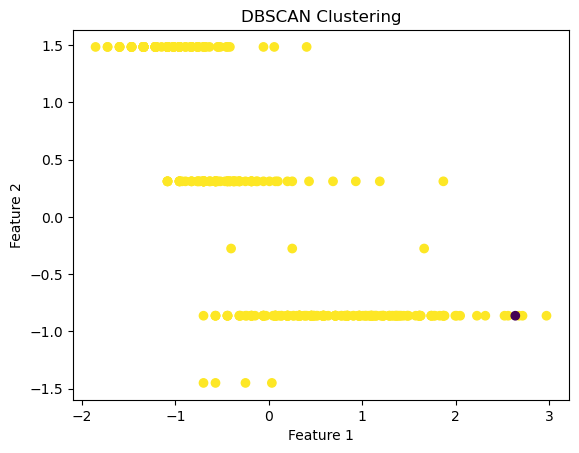

Mejores hiperparámetros:
EPS: 2.0
Min_samples: 20


In [7]:
for eps in eps_values:
    for min_samples in min_samples_values:
        dbscan = DBSCAN(eps=eps, min_samples=min_samples)
        clusters = dbscan.fit_predict(data_scaled)
        try:
            silhouette_score = metrics.silhouette_score(data_scaled, clusters)
            if silhouette_score > best_score:
                best_score = silhouette_score
                best_eps = eps
                best_min_samples = min_samples
                best_clusters = clusters
        except:
            continue

dbscan = DBSCAN(eps=best_eps, min_samples=best_min_samples)
best_clusters = dbscan.fit_predict(data_scaled)

plt.scatter(data_scaled[:,0], data_scaled[:,1], c=best_clusters, cmap='viridis')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('DBSCAN Clustering')
plt.show() 

print("Mejores hiperparámetros:")
print("EPS:", best_eps)
print("Min_samples:", best_min_samples)

##### 1- Interpretamos sobre todas las combinaciones posibles de valores de eps y min_samples definidos en eps_values y min_samples_values.
##### 2- Para cada combinación de valores de eps y min_samples, ajustamos un modelo DBSCAN utilizando esos valores y lo aplica al conjunto de datos normalizado (data_scaled) para obtener los clusters.
##### 3- Calculamos el puntaje de silueta para los clusters obtenidos utilizando la función metrics.silhouette_score.
##### 4- Actualizamos los valores de best_score, best_eps, best_min_samples y best_clusters si el puntaje de silueta actual es mayor que el mejor puntaje de silueta encontrado hasta el momento.
##### 5- Utilizamos los mejores valores de eps y min_samples para ajustar el modelo DBSCAN y obtener los clusters finales.
##### 6- Visualizamos los clusters en un gráfico de dispersión, donde cada punto representa una instancia de datos y su color indica a qué cluster pertenece.
##### 7- Después imprimimos los mejores valores de eps y min_samples.

## Conclusion

#### Como vimos que los resultados del "eps" es 2.0 y "min_samples" es 20, Podemos decir que DBSCAN buscará clusters donde cada punto central tenga al menos 20 puntos dentro de su vecindad (incluyendo él mismo) y donde todos estos puntos estén dentro de una distancia de 2.0 unidades entre sí. 
#### Esto tiende a resultar en clusters más grandes y menos clusters en general, ya que requiere una densidad más alta de puntos para formar un cluster.

#### Con estos resultados son especialmente relevantes para aplicaciones donde se busca identificar grupos densamente poblados en conjuntos de datos complejos. 
#### La capacidad de DBSCAN para identificar clusters de formas irregulares y tamaños variables, junto con su robustez frente a puntos atípicos, lo hace una herramienta valiosa para análisis exploratorios y tareas de segmentación en una variedad de dominios.